In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
dir = '/content/drive/MyDrive/Datasets/Food10/train/'
dirtest = '/content/drive/MyDrive/Datasets/Food10/test'
name_classes = ['Banh beo', 'Banh chung', 'Banh khot', 'Banh mi', 'Banh xeo', 'Bun dau mam tom', 'Canh chua', 'Com tam', 'Hu tieu', 'Pho']

In [3]:
name = ['Banh_beo', 'Banh_chung', 'Banh_khot', 'Banh_mi', 'Banh_xeo', 'Bun_dau', 'Canh_chua', 'Com_tam', 'Hu_tieu', 'Pho']

for i in range(len(name)):
  name[i] = list()

In [4]:
for i in range(len(name)):
  dirname = dir + name_classes[i] +'/' + '*.jpg'
  for img in glob.glob(dirname):
    name[i].append(img_to_array(load_img(img,target_size=(150,150))))
  #name[i] = np.array(name[i])
  #print(name[i].shape)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [5]:
input_data = np.array(name[0] + name[1] + name[2] + name[3] + name[4] + name[5] + name[6] + name[7] + name[8] + name[9])
print(input_data.shape)

(6273, 150, 150, 3)


In [6]:
input_labels = np.array([0]*len(name[0]) + [1]*len(name[1]) + [2]*len(name[2]) + [3]*len(name[3]) 
                        + [4]*len(name[4]) + [5]*len(name[5]) + [6]*len(name[6])
                        + [7]*len(name[7]) + [8]*len(name[8]) + [9]*len(name[9]))
print(input_labels.shape)

(6273,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(input_data, input_labels, train_size=0.8, test_size=0.2, random_state= 0)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test/= 255

In [9]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [10]:
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
Model = Sequential()
Model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (150,150,3)))
Model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
Model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
Model.add(Dense(10,activation = 'softmax'))

opt = SGD(lr = 0.01,momentum = 0.9)

Model.compile(optimizer= opt,loss = 'categorical_crossentropy', metrics=['accuracy'])
history = Model.fit(X_train, y_train,epochs=25,batch_size = 64,validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/25
79/79 [==============================] - 25s 158ms/step - loss: 2.4117 - accuracy: 0.1375 - val_loss: 2.2534 - val_accuracy: 0.1689
Epoch 2/25
79/79 [==============================] - 10s 129ms/step - loss: 2.1362 - accuracy: 0.2128 - val_loss: 2.0717 - val_accuracy: 0.2406
Epoch 3/25
79/79 [==============================] - 11s 134ms/step - loss: 1.9996 - accuracy: 0.2808 - val_loss: 2.0814 - val_accuracy: 0.2351
Epoch 4/25
79/79 [==============================] - 10s 131ms/step - loss: 1.9140 - accuracy: 0.3127 - val_loss: 1.8379 - val_accuracy: 0.3514
Epoch 5/25
79/79 [==============================] - 10s 132ms/step - loss: 1.7201 - accuracy: 0.3972 - val_loss: 1.7184 - val_accuracy: 0.4040
Epoch 6/25
79/79 [==============================] - 10s 133ms/step - loss: 1.5492 - accuracy: 0.4669 - val_loss: 1.6857 - val_accuracy: 0.4159
Epoch 7/25
79/79 [==============================] - 11s 133ms/step - loss: 1.3750 - accuracy: 0.5349 - val_loss: 1.7621 - val_accuracy: 0.4127

In [12]:
Model.evaluate(X_test, y_test)

40/40 [==============================] - 2s 31ms/step - loss: 6.1286 - accuracy: 0.4319


[6.1285786628723145, 0.43187251687049866]

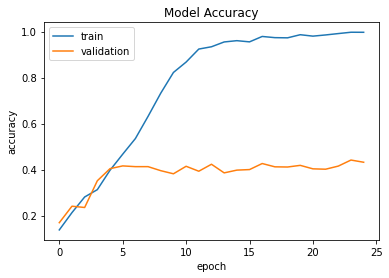

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [14]:
y_pred = Model.predict(X_test)

Banh xeo


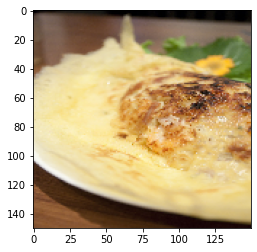

In [16]:
img = load_img('53.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
print(name_classes[np.argmax(Model.predict(img),axis = 1)[0]])